# GetBiologicalData

Gets required additional biological data from BioCyc for Arabidopsis thaliana

Assumes BioCyc pathway-tools is running locally and appropriate PGDB has been imported

./pathway-tools -lisp -python-local-only

Uses the pythoncyc package to access pathway-tools

Import pythoncyc

In [1]:
import pythoncyc

In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Connect to pathway-tools and specify species

In [3]:
ara = pythoncyc.select_organism('ara')

Load time-series data file

In [84]:
arr_data_pd = pd.read_csv("./Data/Arabidopsis-T87-timeseries-NaCl-by-metabolite-BioCyc-Master-SOM.csv")

In [85]:
arr_data_pd.head(5)

,BioCyC Name,Metabolite,0.5,1,2,4,12,24,48,72
0,PYRUVATE,Pyruvate,1.19,1.32,0.86,0.68,0.54,1.84,3.23,3.63
1,LACTATE,Lactate,0.87,1.26,0.98,0.67,0.53,4.94,3.67,12.75
2,ETHANOL-AMINE,Ethanolamine,1.31,1.45,1.18,1.22,0.52,0.59,0.31,0.26
3,GLYCEROL,Glycerol,1.61,0.72,0.68,1.91,1.42,3.30,0.90,1.40
4,SUC,Succinate,0.75,1.08,0.80,0.55,0.39,0.21,0.87,1.62


Extract first column of BioCyC metabolite names

In [86]:
compounds = arr_data_pd["BioCyC Name"].tolist()
compounds

['PYRUVATE',
 'LACTATE',
 'ETHANOL-AMINE',
 'GLYCEROL',
 'SUC',
 'GLYCERATE',
 'FUM',
 'CADAVERINE',
 'MAL',
 '4-AMINO-BUTYRATE',
 'CYS',
 '2-KETOGLUTARATE',
 'CIS-ACONITATE',
 'PUTRESCINE',
 'SHIKIMATE',
 'CIT',
 'FRU',
 'GLUCOSE',
 'LYS',
 'TYR',
 'GLUCONATE',
 'CPD0-1083',
 'URATE',
 'SUCROSE',
 'TREHALOSE',
 'L-ASPARTATE',
 'ASN',
 'SER',
 'GLY',
 'L-ALPHA-ALANINE',
 'GLT',
 'GLN',
 'THR',
 'PRO',
 'VAL',
 'TRP',
 'ILE',
 'LEU',
 'PHE',
 'FORMATE',
 'FOLATES']

Create empty numpy array for common pathways and common enzymes

In [87]:
rows, cols = (len(compounds), len(compounds))
common_pathways = pd.DataFrame(np.zeros((rows, cols)))
common_enzymes = pd.DataFrame(np.zeros((rows, cols)))

Calculate common pathways between every pair of compounds

No data for lactate or glucose so create exceptions

Use sets so easier to find intersection (common paths)

In [88]:
exceptions = {'LACTATE', 'GLUCOSE', 'FOLATES'}
print(rows, cols)
for row in range(0, rows):
    for column in range(0, cols):
        if (row == cols):
            common_pathways[row][cols] = 0
        if compounds[column] in exceptions:
            common_pathways[row][column] = 0
            continue
        if compounds[row] in exceptions:
            common_pathways[row][column] = 0
            continue
        row_paths = set(ara.pathways_of_compound(compounds[row]))
        col_paths = set(ara.pathways_of_compound(compounds[column]))
        common_paths = row_paths.intersection(col_paths)
        common_pathways[row][column] = len(common_paths)
common_pathways.info()
common_pathways.head(5)

41 41
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       41 non-null     float64
 1   1       41 non-null     float64
 2   2       41 non-null     float64
 3   3       41 non-null     float64
 4   4       41 non-null     float64
 5   5       41 non-null     float64
 6   6       41 non-null     float64
 7   7       41 non-null     float64
 8   8       41 non-null     float64
 9   9       41 non-null     float64
 10  10      41 non-null     float64
 11  11      41 non-null     float64
 12  12      41 non-null     float64
 13  13      41 non-null     float64
 14  14      41 non-null     float64
 15  15      41 non-null     float64
 16  16      41 non-null     float64
 17  17      41 non-null     float64
 18  18      41 non-null     float64
 19  19      41 non-null     float64
 20  20      41 non-null     float64
 21  21      41 non-null     float64
 22

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,61.0,0.0,0.0,0.0,5.0,1.0,2.0,0.0,4.0,2.0,...,6.0,4.0,0.0,2.0,4.0,3.0,1.0,3.0,2.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,0.0,0.0,34.0,0.0,6.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [89]:
common_pathways.head(5)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,61.0,0.0,0.0,0.0,5.0,1.0,2.0,0.0,4.0,2.0,...,6.0,4.0,0.0,2.0,4.0,3.0,1.0,3.0,2.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,0.0,0.0,34.0,0.0,6.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Add metabolites as column and row identifiers

In [91]:
common_pathways.head(5)
#type(compounds)
#print(compounds)
#print(len(compounds))
#print(common_pathways.info())
#compounds.insert(0, "")
common_pathways.columns = compounds
#common_enzymes.rows = compounds
#common_enzymes.head(5)

In [92]:
common_pathways.head(5)

,PYRUVATE,LACTATE,ETHANOL-AMINE,GLYCEROL,SUC,GLYCERATE,FUM,CADAVERINE,MAL,4-AMINO-BUTYRATE,...,GLN,THR,PRO,VAL,TRP,ILE,LEU,PHE,FORMATE,FOLATES
0,61.0,0.0,0.0,0.0,5.0,1.0,2.0,0.0,4.0,2.0,...,6.0,4.0,0.0,2.0,4.0,3.0,1.0,3.0,2.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,0.0,0.0,34.0,0.0,6.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Write common pathways to a file

In [33]:
common_pathways.to_csv("./Data/Arabidopsis-T87-timeseries-NaCl-by-metabolite-BioCyc-Master-Common-Pathways.csv", sep=",")

Plot distribution of number of common pathways

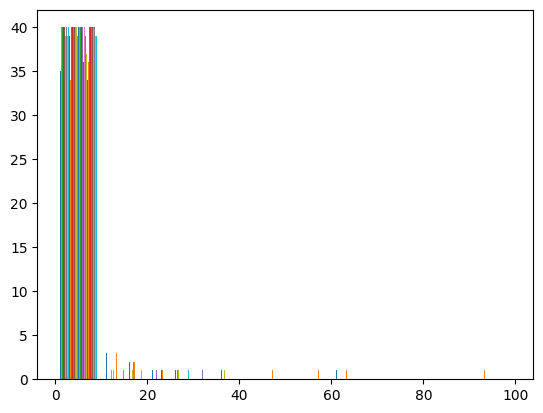

In [36]:
plt.hist(common_pathways, bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.show()

Calculate common enzymes between every pair of compounds

In [37]:
for row in range(0, rows):
    for column in range(0, cols):
        if compounds[column] in exceptions:
            common_enzymes[row][column] = 0
            continue
        if compounds[row] in exceptions:
            common_enzymes[row][column] = 0
            continue
        total_row_ezys = set()
        row_paths = ara.pathways_of_compound(compounds[row])
        for path in row_paths:
            row_ezys = ara.enzymes_of_pathway(path)
            for ezy in row_ezys:
                if ezy not in total_row_ezys:
                    total_row_ezys.add(ezy)
        total_col_ezys = set()
        col_paths = ara.pathways_of_compound(compounds[column])
        for path in col_paths:
            col_ezys = ara.enzymes_of_pathway(path)
            for ezy in col_ezys:
                if ezy not in total_col_ezys:
                    total_col_ezys.add(ezy)
        common_enzymes[row][column] = len(total_row_ezys.intersection(total_col_ezys))

### Add metabolites as column and row identifiers

In [54]:
common_enzymes.head(5)
type(compounds)
print(compounds)
print(len(compounds))
print(common_enzymes.info())
#compounds.insert(0, "")
common_enzymes.columns = compounds
#common_enzymes.rows = compounds
#common_enzymes.head(5)

['PYRUVATE', 'LACTATE', 'ETHANOL-AMINE', 'GLYCEROL', 'SUC', 'GLYCERATE', 'FUM', 'CADAVERINE', 'MAL', '4-AMINO-BUTYRATE', 'CYS', '2-KETOGLUTARATE', 'CIS-ACONITATE', 'PUTRESCINE', 'SHIKIMATE', 'CIT', 'FRU', 'GLUCOSE', 'LYS', 'TYR', 'GLUCONATE', 'CPD0-1083', 'URATE', 'SUCROSE', 'TREHALOSE', 'L-ASPARTATE', 'ASN', 'SER', 'GLY', 'L-ALPHA-ALANINE', 'GLT', 'GLN', 'THR', 'PRO', 'VAL', 'TRP', 'ILE', 'LEU', 'PHE', 'FORMATE', 'FOLATES']
41
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       40 non-null     float64
 1   1       40 non-null     float64
 2   2       40 non-null     float64
 3   3       40 non-null     float64
 4   4       40 non-null     float64
 5   5       40 non-null     float64
 6   6       40 non-null     float64
 7   7       40 non-null     float64
 8   8       40 non-null     float64
 9   9       40 non-null     float64
 10  10      40 non-n

ValueError: Length mismatch: Expected axis has 40 elements, new values have 41 elements

Write common pathways to a file

In [40]:
common_enzymes.to_csv("./Data/Arabidopsis-T87-timeseries-NaCl-by-metabolite-BioCyc-Master-Common-Enzymes.csv", sep=",")

Plot distribution of number of common enzymes

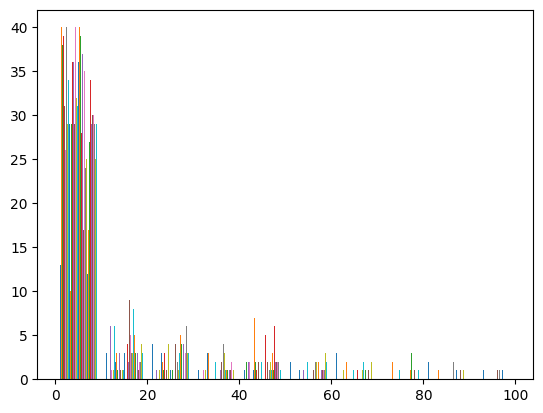

In [41]:
plt.hist(common_enzymes, bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.show()